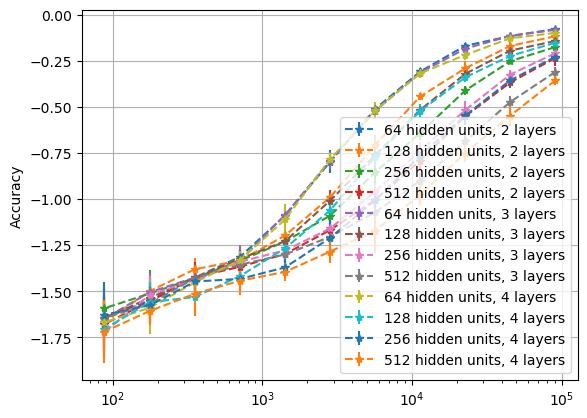

[90941 45470 22735 11367  5683  2841  1420   710   355   177    88]


In [3]:
import numpy as np
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

seeds = [i+1 for i in range(10)]
hiddens = [64,128, 256,512]
layers = [2, 3, 4]
partitions = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def get_mean_std(df, partition, hidden, layer, col):
    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) 
    filtered_df = df[condition]
    # print(filtered_df, len(filtered_df))
    if col == 'Difference Accuracy':
        filtered_df[col] = 100*(filtered_df['Test Accuracy'] - filtered_df['Train Accuracy'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss':
        filtered_df[col] = filtered_df['Test Loss'] - filtered_df['Train Loss']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col in ['Train Accuracy', 'Test Accuracy']:
        filtered_df[col] = 100*filtered_df[col]
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Accuracy Abs':
        filtered_df[col] = np.abs(100*filtered_df['Test Accuracy'] - 100*filtered_df['Train Accuracy'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss Abs':
        filtered_df[col] = np.abs(filtered_df['Test Loss'] - filtered_df['Train Loss'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    return [filtered_df[col].mean(), filtered_df[col].std()]


df = pd.read_csv('data.csv')
cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss','Difference Accuracy Abs', 'Difference Loss Abs']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []

for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes,  np.array(means['Train Loss'])-np.array(means['Test Loss']), yerr=stds[col], fmt= '--*')
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend)
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale

# plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.show()
print(nodes)


In [4]:
# Plot 1 and 2
# cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []

# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#5254a3'
]

# Set the custom color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

print(len(colors))

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        ax.errorbar(nodes,  np.array(means['Difference Accuracy']), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Nodes')
plt.ylabel('Accuracy Difference')
plt.savefig('acc_diff.pdf')
plt.figure()
fig, ax = plt.subplots()

legend = []
color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes,  means['Difference Loss'], yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])

        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Nodes')
plt.ylabel('Loss Difference')
plt.savefig('loss_diff.pdf')

15


<Figure size 640x480 with 0 Axes>

15
-0.601148267583721 3.491513309663226 -0.9967003835482805 1.1990695571388834e-06
-0.5743503363529976 3.5304049389071324 -0.9973390972963766 1.0611184665219147e-05
-0.48790799745187907 3.280324957982991 -0.9906921462209279 0.0001295510146881472
-0.47441878940666926 3.332956881425215 -0.9909905894211737 0.0010251576219695714
-0.597109309240718 3.4657289336213624 -0.9970211606921969 9.287057352138255e-07
-0.5324037389110894 3.382131429280001 -0.9941871804014664 5.058510321987339e-05
-0.44078228709276773 3.129315804276576 -0.9823213677073375 0.0004660384724250111
-0.3889422310288175 3.0173867866936956 -0.9824227445209316 0.0027900505965283685
-0.5342523558543544 3.2355292381625773 -0.9970864682751432 8.786684357319303e-07
-0.4688660368391835 3.117703707823553 -0.9928308708390252 8.326257828943768e-06
-0.4263417548161201 3.080246650359965 -0.9829120579008036 0.0004355018273259407
-0.37022256200668346 2.9670882454135725 -0.9839826450860877 0.0024275817410240024
64 3.491513309663226
64 3.46

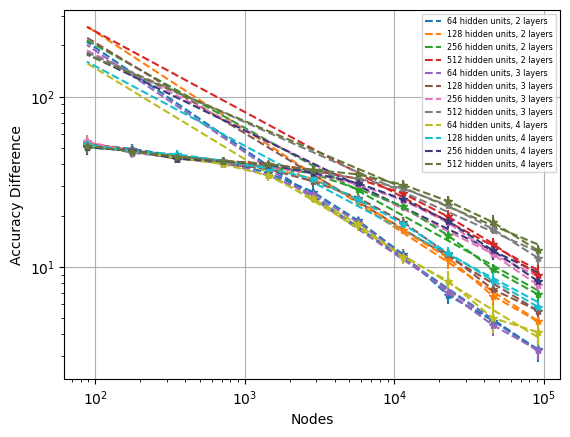

<Figure size 640x480 with 0 Axes>

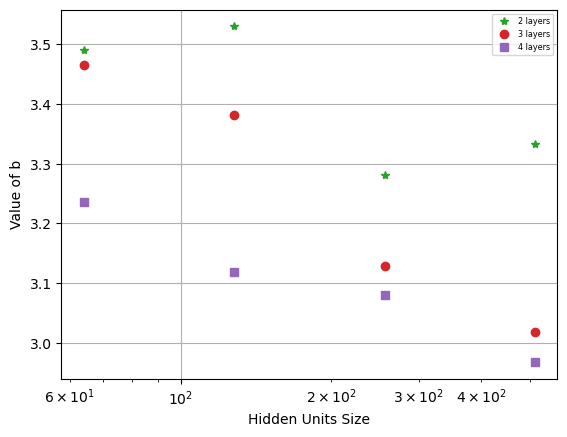

<Figure size 640x480 with 0 Axes>

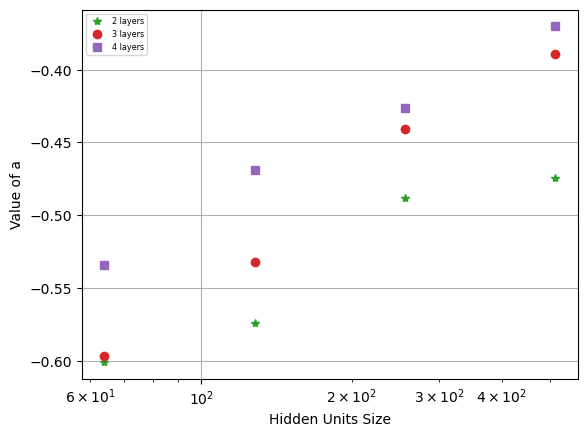

<Figure size 640x480 with 0 Axes>

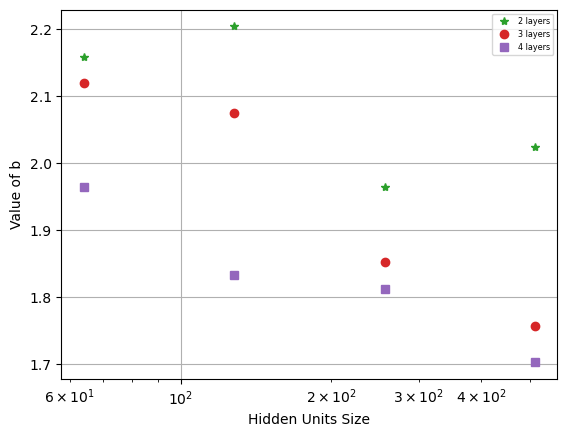

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

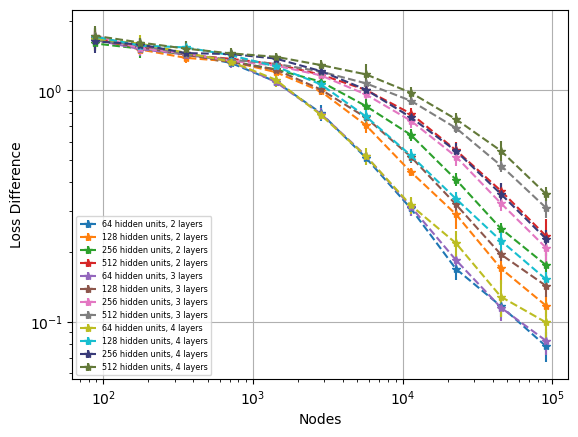

In [5]:
# LOG ON THE NODES
import scipy 

def estimate_coefficients(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    a = numerator / denominator
    b = y_mean - a * x_mean
    r, prob = scipy.stats.pearsonr(x, y)

    return a, b, r, prob 

# cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
        ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        print(a, b,r,p)
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)

plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale

plt.xlabel('Nodes')
plt.ylabel('Accuracy Difference')
plt.savefig('acc_diff.pdf')
plt.figure()
fig, ax = plt.subplots()

###########
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        if layer == 2:
            ax.plot(hidden, b,'*', color=colors[layer])
        if layer == 3:
            ax.plot(hidden, b,'o', color=colors[layer])
        if layer == 4:
            ax.plot(hidden, b,'s', color=colors[layer])
        print(hidden,b)
        # color_count = color_count + 1
        if hidden == 64:
            legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']
ax.legend(legend, fontsize='xx-small') 

# plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.grid(True)

plt.xlabel('Hidden Units Size')
plt.ylabel('Value of b')
plt.savefig('acc_value_of_b_vs_hidden_size.pdf')
plt.figure()

########### NOW WE PLOT A
fig, ax = plt.subplots()
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        if layer == 2:
            ax.plot(hidden, a,'*', color=colors[layer])
        if layer == 3:
            ax.plot(hidden, a,'o', color=colors[layer])
        if layer == 4:
            ax.plot(hidden, a,'s', color=colors[layer])
        print(hidden,b)
        # color_count = color_count + 1
        if hidden == 64:
            legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']
ax.legend(legend, fontsize='xx-small') 


plt.grid(True)



# plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale

plt.xlabel('Hidden Units Size')
plt.ylabel('Value of a')
plt.savefig('acc_value_of_a_vs_hidden_size.pdf')
plt.figure()
fig, ax = plt.subplots()
########### 


###########
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Loss Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        if layer == 2:
            ax.plot(hidden, b,'*', color=colors[layer])
        if layer == 3:
            ax.plot(hidden, b,'o', color=colors[layer])
        if layer == 4:
            ax.plot(hidden, b,'s', color=colors[layer])
        print(hidden,b)
        # color_count = color_count + 1
        if hidden == 64:
            legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']
ax.legend(legend, fontsize='xx-small') 

# plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.grid(True)

plt.xlabel('Hidden Units Size')
plt.ylabel('Value of b')
plt.savefig('loss_value_of_b_vs_hidden_size.pdf')
plt.figure()

########### NOW WE PLOT A
fig, ax = plt.subplots()
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Loss Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        if layer == 2:
            ax.plot(hidden, a,'*', color=colors[layer])
        if layer == 3:
            ax.plot(hidden, a,'o', color=colors[layer])
        if layer == 4:
            ax.plot(hidden, a,'s', color=colors[layer])
        print(hidden,b)
        # color_count = color_count + 1
        if hidden == 64:
            legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']
ax.legend(legend, fontsize='xx-small') 


plt.grid(True)



# plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale

plt.xlabel('Hidden Units Size')
plt.ylabel('Value of a')
plt.savefig('loss_value_of_a_vs_hidden_size.pdf')
plt.figure()
fig, ax = plt.subplots()
########### 


##########

legend = []
color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes, np.abs(means['Difference Loss']), yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])
        # ax.errorbar(nodes,  means['Difference Loss'], yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])

        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)
plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale

plt.xlabel('Nodes')
plt.ylabel('Loss Difference')
plt.savefig('loss_diff.pdf')

[<matplotlib.lines.Line2D object at 0x169426b50>, <matplotlib.lines.Line2D object at 0x169021670>, <matplotlib.lines.Line2D object at 0x169426d30>] ['2 layers', '3 layers', '4 layers']
64 2.7798622898845835
64 3.491513309663226
64 3.4657289336213624
64 3.2355292381625773
128 2.7851007610367033
128 3.5304049389071324
128 3.382131429280001
128 3.117703707823553
256 2.81057372535982
256 3.280324957982991
256 3.129315804276576
256 3.080246650359965
512 2.77017989570425
512 3.332956881425215
512 3.0173867866936956
512 2.9670882454135725
64 0.9701679746867967
64 2.1587142839334224
64 2.120538800042528
64 1.9643088066461387
128 0.9660702081987269
128 2.2044575688964896
128 2.0748579203662727
128 1.8332490385099385
256 0.9775594457830945
256 1.9652357077064593
256 1.8534211798298017
256 1.8129471701311806
512 0.9682578467946894
512 2.024438759546719
512 1.7574193423407365
512 1.702976555946021
64 0.9701679746867967
64 2.1587142839334224
64 2.120538800042528
64 1.9643088066461387
128 0.96607020

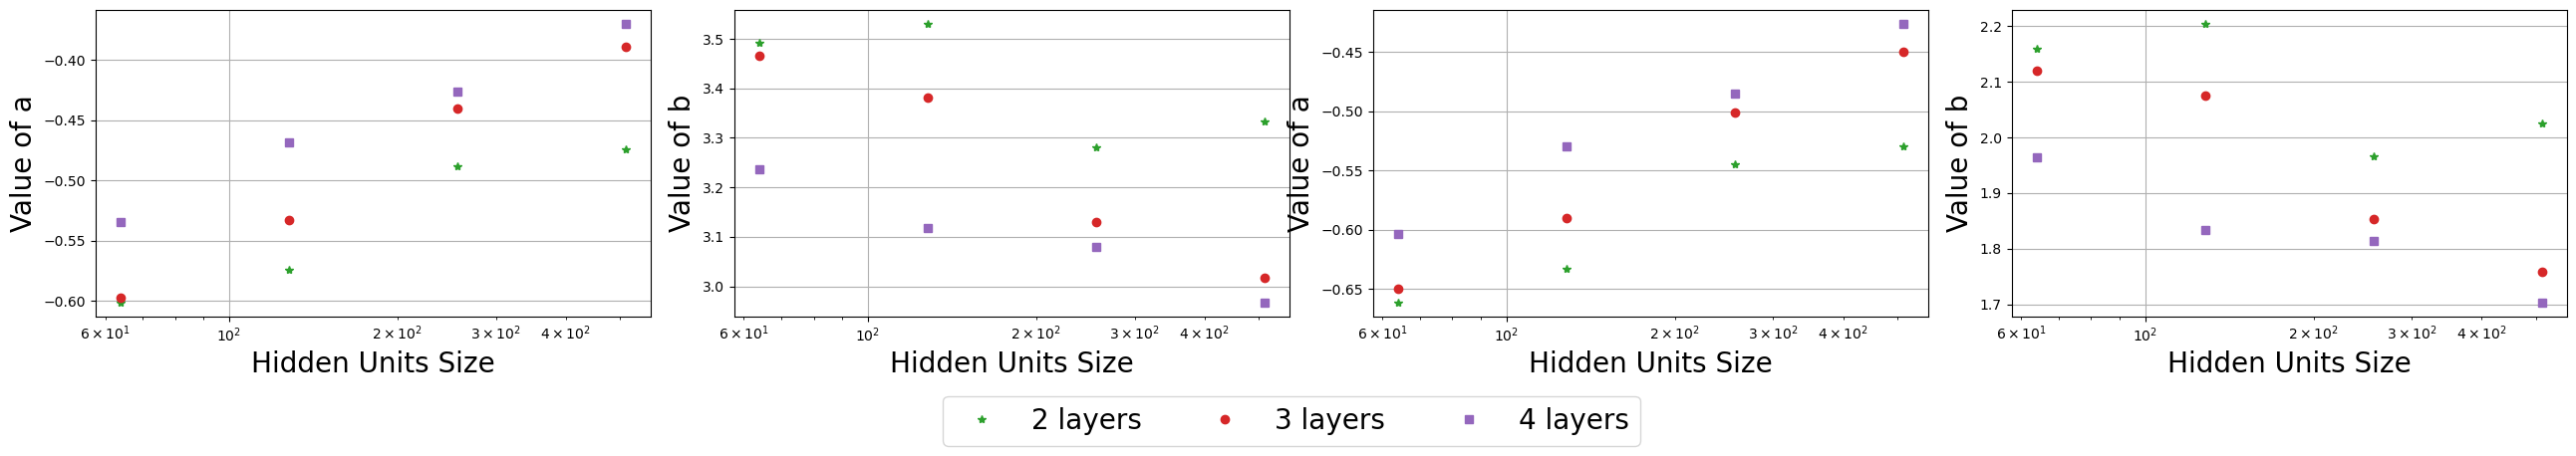

In [10]:
# A and B in horizontal mode
import scipy 

def estimate_coefficients(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    a = numerator / denominator
    b = y_mean - a * x_mean
    r, prob = scipy.stats.pearsonr(x, y)

    return a, b, r, prob 


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 4))#, figaspect=aspect_ratio)
fontsize_val = 20

layers = [1,2,3,4]
###########
i=1
color_count = 0
legend = []

legend_lines = []
legend_labels = []

for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        # if layer == 1:
        #     axes[i].plot(hidden, b, '^', color=colors[layer])
        if layer == 2:
            legend_line, = axes[i].plot(hidden, b,'*', color=colors[layer], label=f'{layer} layers')
        if layer == 3:
            legend_line, = axes[i].plot(hidden, b,'o', color=colors[layer], label=f'{layer} layers')
        if layer == 4:
            legend_line, = axes[i].plot(hidden, b,'s', color=colors[layer], label=f'{layer} layers')

        if hidden == 64 and layer != 1:
            legend_lines.append(legend_line)
            legend_labels.append(f'{layer} layers')
        # print(hidden,b)
        # # color_count = color_count + 1
        # if hidden == 64:
        #     legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']
# axes[i].legend(legend, fontsize='xx-small') 

# plt.yscale('log')  # Set x-axis to logarithmic scale
axes[i].grid(True)
axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    # plt.yscale('log')  # Set x-axis to logarithmic scale

print(legend_lines, legend_labels)
fig.legend(legend_lines, legend_labels, loc='lower center', ncol=3, bbox_to_anchor=(.5, -.25), frameon=True, fontsize=fontsize_val)
# fig.legend(legend_lines, legend_labels)



axes[i].set_xlabel('Hidden Units Size', fontsize=fontsize_val)
axes[i].set_ylabel('Value of b', fontsize=fontsize_val)
# plt.savefig('acc_value_of_b_vs_hidden_size.pdf')
# plt.figure()/

########### NOW WE PLOT A
i=0
# fig, ax = plt.subplots()
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        # if layer == 1:
        #     axes[i].plot(hidden, b, '^', color=colors[layer])
        if layer == 2:
            axes[i].plot(hidden, a,'*', color=colors[layer])
        if layer == 3:
            axes[i].plot(hidden, a,'o', color=colors[layer])
        if layer == 4:
            axes[i].plot(hidden, a,'s', color=colors[layer])
        print(hidden,b)

        # else:
        # legend = legend + [f'{layer} layers']
# axes[i].legend(legend, fontsize='xx-small') 

axes[i].grid(True)
axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    # plt.yscale('log')  # Set x-axis to logarithmic scale


axes[i].set_xlabel('Hidden Units Size', fontsize=fontsize_val)
axes[i].set_ylabel('Value of a', fontsize=fontsize_val)
# plt.grid(True)



# # plt.yscale('log')  # Set x-axis to logarithmic scale
# plt.xscale('log')  # Set x-axis to logarithmic scale

# plt.xlabel('Hidden Units Size')
# plt.ylabel('Value of a')
# plt.savefig('acc_value_of_a_vs_hidden_size.pdf')
# plt.figure()
# fig, ax = plt.subplots()
########### 


###########
i=3
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Loss Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        # if layer == 1:
        #     axes[i].plot(hidden, b, '^', color=colors[layer])
        if layer == 2:
            axes[i].plot(hidden, b,'*', color=colors[layer])
        if layer == 3:
            axes[i].plot(hidden, b,'o', color=colors[layer])
        if layer == 4:
            axes[i].plot(hidden, b,'s', color=colors[layer])
        print(hidden,b)
        # color_count = color_count + 1
        if hidden == 64:
            legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']

axes[i].grid(True)
axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
# plt.yscale('log')  # Set x-axis to logarithmic scale

axes[i].set_ylabel('Value of b', fontsize=fontsize_val)
axes[i].set_xlabel('Hidden Units Size', fontsize=fontsize_val)

########### NOW WE PLOT A
# fig, ax = plt.subplots()
i=2
color_count = 0
legend = []
for idx,hidden in enumerate(hiddens):
    for layer in layers:
    
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        
        nodes = np.unique(nodes)[::-1]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Loss Abs'])[vec]))
        # ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        # if layer == 1:
        #     axes[i].plot(hidden, b, '^', color=colors[layer])
        if layer == 2:
            axes[i].plot(hidden, a,'', color=colors[layer])
        if layer == 2:
            axes[i].plot(hidden, a,'*', color=colors[layer])
        if layer == 3:
            axes[i].plot(hidden, a,'o', color=colors[layer])
        if layer == 4:
            axes[i].plot(hidden, a,'s', color=colors[layer])
        print(hidden,b)
        # color_count = color_count + 1
        if hidden == 64:
            legend = legend + [f'{layer} layers']
        # else:
        # legend = legend + [f'{layer} layers']
# ax.legend(legend, fontsize='xx-small') 


# plt.grid(True)

axes[i].grid(True)
axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    # plt.yscale('log')  # Set x-axis to logarithmic scale


axes[i].set_xlabel('Hidden Units Size', fontsize=fontsize_val)
axes[i].set_ylabel('Value of a', fontsize=fontsize_val)

plt.subplots_adjust(wspace=0.15)
plt.savefig('a_and_b_vs_hidden_size.pdf', bbox_inches='tight')


In [ ]:
# LOG ON THE NODES

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)

plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale

plt.xlabel('Nodes')
plt.ylabel('Accuracy Difference')
plt.savefig('acc_diff.pdf')
plt.figure()
fig, ax = plt.subplots()

legend = []
color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes, np.abs(means['Difference Loss']), yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])
        # ax.errorbar(nodes,  means['Difference Loss'], yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])

        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)
plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale

plt.xlabel('Nodes')
plt.ylabel('Loss Difference')
plt.savefig('loss_diff.pdf')

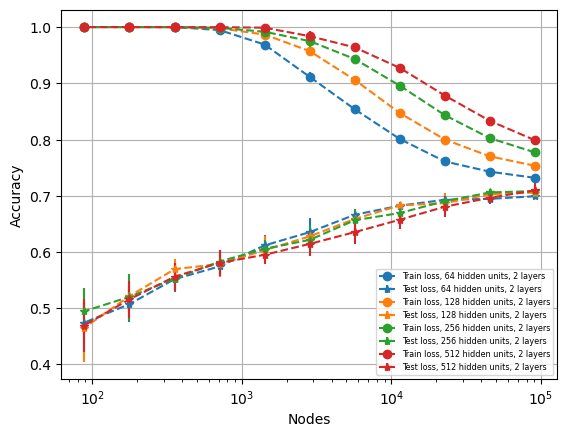

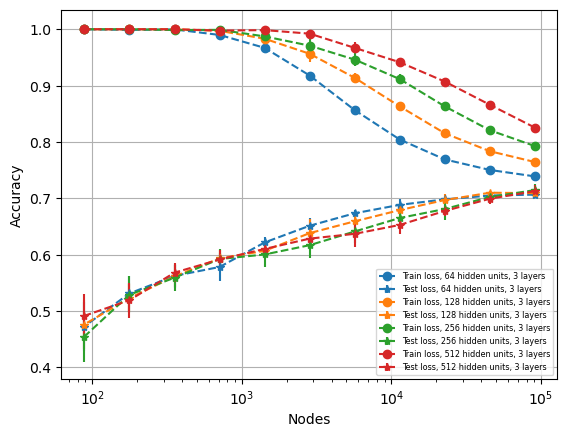

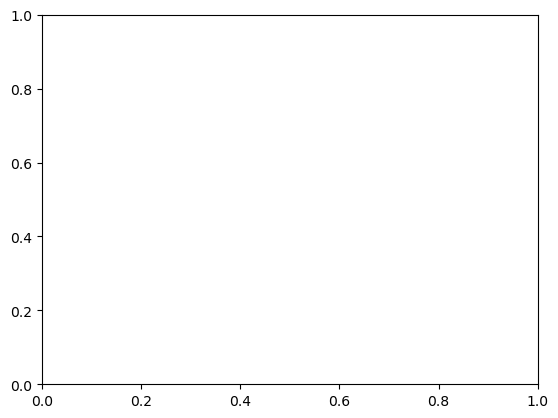

In [3]:
# Plot 3 and 4
layers = [1,2,3,4]
hiddens = [64, 128, 256,512]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []
color_count = 0

for layer in layers:
    color_count = 0
    legend = []

    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        ax.errorbar(nodes,  np.array(means['Train Accuracy']), yerr=stds['Train Accuracy'], fmt= '--o', color=colors[color_count])
        ax.errorbar(nodes,  np.array(means['Test Accuracy']), yerr=stds['Test Accuracy'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        if layer ==1:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
        else:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
    ax.legend(legend, fontsize='xx-small') 
    plt.grid(True)

    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.xlabel('Nodes')
    plt.ylabel('Accuracy')
    plt.savefig(f'acc_layer_{layer}.pdf')
    fig, ax = plt.subplots()

legend = []
color_count = 0

for layer in layers:
    color_count = 0
    legend = []

    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes,  np.array(means['Train Loss']), yerr=stds['Train Loss'], fmt= '--o', color=colors[color_count])
        ax.errorbar(nodes,  np.array(means['Test Loss']), yerr=stds['Test Loss'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        if layer ==1:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
        else:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']



    ax.legend(legend, fontsize='xx-small') 
    plt.grid(True)
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.xlabel('Nodes')
    plt.ylabel('Loss')
    plt.savefig(f'loss_layer_{layer}.pdf')
    fig, ax = plt.subplots()


In [23]:
# Compute the person correlations
import scipy
import warnings
warnings.filterwarnings('ignore')

hiddens = [64, 128, 256,512]
layers = [1, 2, 3, 4]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        vec = vec[0]

        r_acc, prob_acc = scipy.stats.pearsonr(np.log10(np.array(nodes)[vec]), np.log10(np.abs(np.array(means['Difference Accuracy'])[vec])))
        r_loss, prob_loss = scipy.stats.pearsonr(np.log10(np.array(nodes)[vec]), np.log10(np.abs(np.array(means['Difference Loss'])[vec])))

        # print(f"${layer}$ & ${hidden}$  & ${round(r,3)}$  & ${round(prob,4)}$ \\\\ \hline")
        r_acc= "{:.3f}".format(r_acc)
        prob_acc= "{:.3f}".format(prob_acc)
        r_loss= "{:.3f}".format(r_loss)
        prob_loss= "{:.3f}".format(prob_loss)
        print(f"${layer}$ & ${hidden}$  & ${r_acc}/{r_loss}$  \\\\ \hline")


$1$ & $64$  & $-0.991/-0.980$  \\ \hline
$1$ & $128$  & $-0.992/-0.980$  \\ \hline
$1$ & $256$  & $-0.994/-0.985$  \\ \hline
$1$ & $512$  & $-0.993/-0.981$  \\ \hline
$2$ & $64$  & $-0.997/-0.997$  \\ \hline
$2$ & $128$  & $-0.997/-0.998$  \\ \hline
$2$ & $256$  & $-0.991/-0.993$  \\ \hline
$2$ & $512$  & $-0.991/-0.994$  \\ \hline
$3$ & $64$  & $-0.997/-0.998$  \\ \hline
$3$ & $128$  & $-0.994/-0.996$  \\ \hline
$3$ & $256$  & $-0.982/-0.988$  \\ \hline
$3$ & $512$  & $-0.982/-0.987$  \\ \hline
$4$ & $64$  & $-0.997/-0.998$  \\ \hline
$4$ & $128$  & $-0.993/-0.994$  \\ \hline
$4$ & $256$  & $-0.983/-0.989$  \\ \hline
$4$ & $512$  & $-0.984/-0.988$  \\ \hline


In [6]:
# SAME HORIZONTAL PLOT
import scipy


fontsize_val = 20

def get_mean_std(df, partition, hidden, layer, col):
    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer)
    filtered_df = df[condition]
    if col == 'Difference Accuracy':
        filtered_df[col] = 100*filtered_df['Test Accuracy'] - 100*filtered_df['Train Accuracy']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss':
        filtered_df[col] = filtered_df['Test Loss'] - filtered_df['Train Loss']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Accuracy Abs':
        filtered_df[col] = np.abs(100*filtered_df['Test Accuracy'] - 100*filtered_df['Train Accuracy'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss Abs':
        filtered_df[col] = np.abs(filtered_df['Test Loss'] - filtered_df['Train Loss'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Test Accuracy' or col == 'Train Accuracy':
        vec = 100*filtered_df[col]
        return [vec.mean(), vec.std()]
    return [filtered_df[col].mean(), filtered_df[col].std()]


def estimate_coefficients(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    a = numerator / denominator
    b = y_mean - a * x_mean
    
    r, prob = scipy.stats.pearsonr(x, y)
        # r_loss, prob_loss = scipy.stats.pearsonr(nodes, means['Difference Loss'])

    return a, b, r, prob


# def number_vals(hidden, layer):
#     if layer == 2 and hidden == 64: 
#         return 6
#     if layer in [3,4] and hidden == 512: 
#         return 3

#     return 4

layers = [1,2,3,4]
hiddens = [64, 128, 256,512]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy',
        'Difference Accuracy', 'Difference Loss',
        'Difference Accuracy Abs', 'Difference Loss Abs']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]

# fig, ax = plt.subplots()

legend_lines = []
legend_labels = []
# # FIRST SET OF PLOTS
legend = []
color_count = 0

# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
aspect_ratio = 2.0  # Adjust this value as needed

# Create a figure with one row and four columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 4))#, figaspect=aspect_ratio)


# for i, layer in enumerate(layers):
#     color_count = 0
#     legend = []

#     for hidden in hiddens:
#         means = {key: [] for key in cols}
#         stds  = {key: [] for key in cols}               

#         for partition in partitions:
#             for col in cols:
#                 means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
#                 stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
#         axes[i].errorbar(nodes,  np.array(means['Train Accuracy']), yerr=stds['Train Accuracy'], fmt= '--o', color=colors[color_count])
#         axes[i].errorbar(nodes,  np.array(means['Test Accuracy']), yerr=stds['Test Accuracy'], fmt= '--*', color=colors[color_count])
#         color_count = color_count + 1
#         # if layer ==1:
#         #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
#         #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
#         # else:
#         #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
#         #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
#         if layer ==1:
#             legend = legend + [f'Train acc']
#             legend = legend + [f'Test acc']
#         else:
#             legend = legend + [f'Train acc']
#             legend = legend + [f'Test acc']
#     # ax.legend(legend, fontsize='xx-small') 
#     # axes[i].legend(legend)

#     axes[i].grid(True)
#     axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
#     # plt.yscale('log')  # Set x-axis to logarithmic scale

#     axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
#     axes[i].set_ylabel('Accuracy (%)', fontsize=fontsize_val)
#     # plt.savefig(f'2_acc_layer_{layer}.pdf')
#     # fig, ax = plt.subplots()


# # SECOND SET OF PLOTS
legend = []
color_count = 0

for i, layer in enumerate(layers):
    # i = i+1
    color_count = 0
    legend = []

    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        train_acc_line = axes[i].errorbar(nodes,  np.array(means['Train Loss']), yerr=stds['Train Loss'], fmt= '--o', color=colors[color_count], label=f'Train {hidden} hidden units')
        test_acc_line = axes[i].errorbar(nodes,  np.array(means['Test Loss']), yerr=stds['Test Loss'], fmt= '--*', color=colors[color_count], label='Test {hidden} hidden units')
        color_count = color_count + 1
        if i == 3 :
            
            legend_lines.append(train_acc_line)
            legend_lines.append(test_acc_line)
            legend_labels.append(f'Train {hidden} hidden units')
            legend_labels.append(f'Test {hidden} hidden units')
        # if layer ==1:
        #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
        #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
        # else:
        #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
        #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
        # if layer ==1:
        #     legend = legend + [f'Train loss']
        #     legend = legend + [f'Test loss']
        # else:
        #     legend = legend + [f'Train loss']
        #     legend = legend + [f'Test loss']


    # ax.legend(legend, fontsize='xx-small') 
    # if i ==3:
    #     axes[i].legend(legend)
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    # plt.yscale('log')  # Set x-axis to logarithmic scale

    axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
    axes[i].set_ylabel('Loss', fontsize=fontsize_val)
    # plt.grid(True)
    # plt.xscale('log')  # Set x-axis to logarithmic scale
    # # plt.yscale('log')  # Set x-axis to logarithmic scale

    # plt.xlabel('Number of nodes in training set')
    # plt.ylabel('Loss')
    # plt.savefig(f'2_loss_layer_{layer}.pdf')
    # fig, ax = plt.subplots()
fig.legend(legend_lines, legend_labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.4), frameon=True, fontsize=fontsize_val)

plt.subplots_adjust(wspace=0.15)
plt.savefig('loss_arxiv_horizontal_1.pdf', bbox_inches='tight')



fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 4))#, figaspect=aspect_ratio)

# THIRD SET OF PLOTS
# legend = []
# color_count = 0

# for i, layer in enumerate(layers):
#     i = i 
#     color_count = 0
#     legend = []

#     for hidden in hiddens:
#         means = {key: [] for key in cols}
#         stds  = {key: [] for key in cols}               

#         for partition in partitions:
#             for col in cols:
#                 means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
#                 stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
#         # ax.errorbar(nodes,  np.array(means['Difference Accuracy Abs']), yerr=stds['Difference Accuracy Abs'], fmt= '--o', color=colors[color_count])
#         vec = np.where(np.array(means['Train Accuracy']) < 95)
#         a, b, r, p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))

#         # vals = number_vals(hidden, layer)
#         # a, b = estimate_coefficients(np.log(nodes[:vals]), np.log(np.array(means['Difference Accuracy Abs'])[:vals]))

#         print(f"Accuracy & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$ & ${p:.3e}$ \\\\ \\hline")
#         # ax.plot(np.log10(nodes), np.log10(np.array(means['Difference Accuracy Abs'])),'*-')
#         # ax.plot(np.log10(nodes), a*np.log10(nodes)+b, '--',color=colors[color_count])
#         axes[i].plot(nodes, np.array(means['Difference Accuracy Abs']),'*-')
#         axes[i].plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
#         color_count = color_count + 1
#         # legend = legend + [f'{hidden} hidden units, {layer} layers values']
#         # legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']
#         # legend = legend + [f'{hidden} hidden units']
#         # legend = legend + [f'{hidden} hidden units linear fit']
#     # ax.legend(legend, fontsize='xx-small') 
#     ax.legend(legend)

#     plt.grid(True)

#     axes[i].grid(True)
#     axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
#     axes[i].set_yscale('log')  # Set x-axis to logarithmic scale

#     axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
#     axes[i].set_ylabel('Accuracy Difference (%)', fontsize=fontsize_val)
#     # plt.savefig(f'2_acc_diff_layer_{layer}.pdf')
#     # fig, ax = plt.subplots()

# # FOURTH SET OF PLOTS
legend = []
color_count = 0

# print('Loss\n')

for i, layer in enumerate(layers):
    color_count = 0
    legend = []
    # i = i+2 
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.array(means['Difference Loss Abs']), yerr=stds['Difference Loss Abs'], fmt= '--o', color=colors[color_count])
        # color_count = color_count + 1
        # legend = legend + [f'{hidden} hidden units, {layer} layers']
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Loss Abs'])[vec]))

        # vals = number_vals(hidden, layer)
        # a, b = estimate_coefficients(np.log(nodes[:vals]), np.log(np.array(means['Difference Accuracy Abs'])[:vals]))

        # print(hidden, layer, a, b,r,p)
        # print(f"${layer}$ & ${hidden}$  & ${a}$ & ${b}$  & ${r}$ & ${ p:.3e }$ \\\\ \hline")
        print(f"Loss & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$ \\\\ \\hline")

        # ax.plot(np.log10(nodes), np.log10(np.array(means['Difference Loss Abs'])),'*-')
        # ax.plot(np.log10(nodes), a*np.log10(nodes)+b, '--',color=colors[color_count])
        axes[i].plot(nodes, np.array(means['Difference Loss Abs']),'*-')
        axes[i].plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units'] #, {layer} layers values']
        # legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']
        legend = legend + [f'{hidden} hidden units linear fit']
        # if i == 3 :
            
        #     legend_lines.append(train_acc_line)
        #     legend_lines.append(test_acc_line)
            # legend_labels.append(f'Train {hidden}')
            # legend_labels.append(f'Test {hidden} hidden units')
    # ax.legend(legend, fontsize='xx-small') 
    ax.legend(legend)

    plt.grid(True)

    axes[i].grid(True)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    axes[i].set_yscale('log')  # Set x-axis to logarithmic scale

    # plt.yscale('log')  # Set x-axis to logarithmic scale

    axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
    axes[i].set_ylabel('Loss Difference', fontsize=fontsize_val)
    # plt.savefig(f'2_loss_diff_layer_{layer}.pdf')
    # fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.15)
plt.savefig('loss_arxiv_horizontal_2.pdf', bbox_inches='tight')


Loss & $1$ & $64$  & $-4.194e-01$ & $9.702e-01$  & $-9.803e-01$ \\ \hline
Loss & $1$ & $128$  & $-4.180e-01$ & $9.661e-01$  & $-9.803e-01$ \\ \hline
Loss & $1$ & $256$  & $-4.191e-01$ & $9.776e-01$  & $-9.847e-01$ \\ \hline
Loss & $1$ & $512$  & $-4.183e-01$ & $9.683e-01$  & $-9.813e-01$ \\ \hline
Loss & $2$ & $64$  & $-6.615e-01$ & $2.159e+00$  & $-9.973e-01$ \\ \hline
Loss & $2$ & $128$  & $-6.327e-01$ & $2.204e+00$  & $-9.984e-01$ \\ \hline
Loss & $2$ & $256$  & $-5.449e-01$ & $1.965e+00$  & $-9.932e-01$ \\ \hline
Loss & $2$ & $512$  & $-5.299e-01$ & $2.024e+00$  & $-9.940e-01$ \\ \hline
Loss & $3$ & $64$  & $-6.498e-01$ & $2.121e+00$  & $-9.975e-01$ \\ \hline
Loss & $3$ & $128$  & $-5.902e-01$ & $2.075e+00$  & $-9.965e-01$ \\ \hline
Loss & $3$ & $256$  & $-5.016e-01$ & $1.853e+00$  & $-9.877e-01$ \\ \hline
Loss & $3$ & $512$  & $-4.497e-01$ & $1.757e+00$  & $-9.871e-01$ \\ \hline
Loss & $4$ & $64$  & $-6.039e-01$ & $1.964e+00$  & $-9.980e-01$ \\ \hline
Loss & $4$ & $128$  & $-5.295

NameError: name 'colors' is not defined

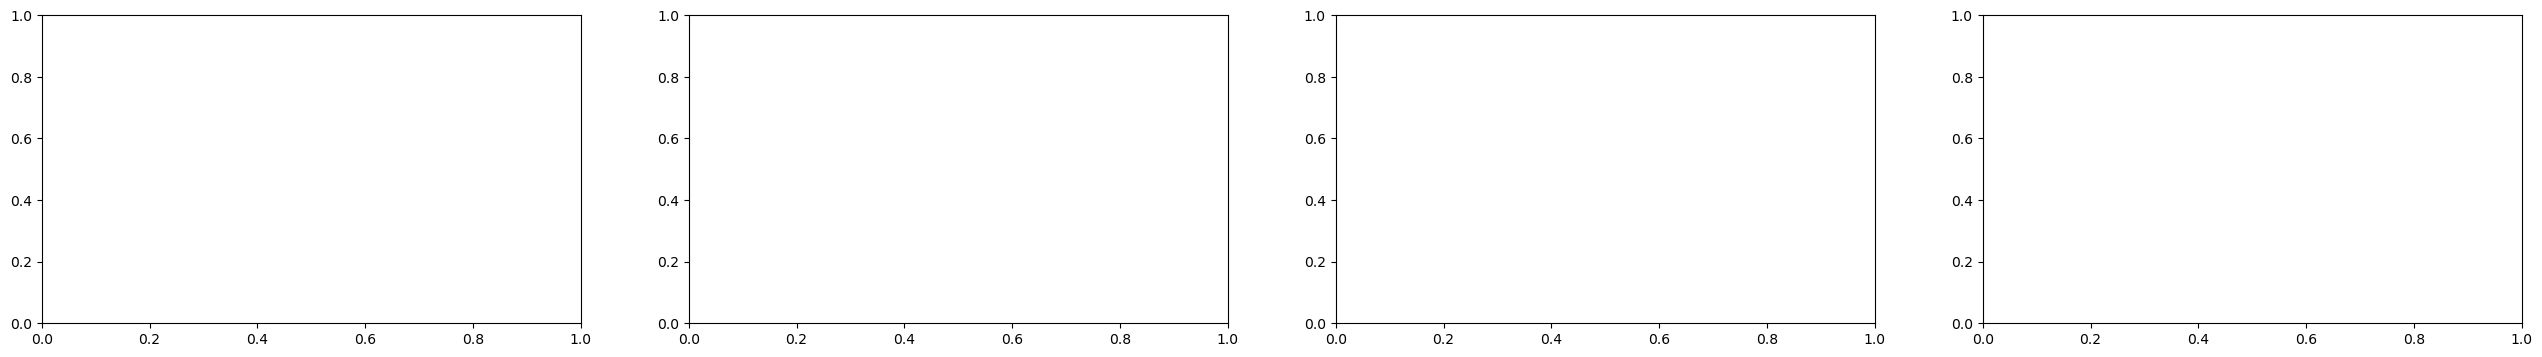

In [2]:
# SAME HORIZONTAL PLOT
import scipy


fontsize_val = 20

def get_mean_std(df, partition, hidden, layer, col):
    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer)
    filtered_df = df[condition]
    if col == 'Difference Accuracy':
        filtered_df[col] = 100*filtered_df['Test Accuracy'] - 100*filtered_df['Train Accuracy']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss':
        filtered_df[col] = filtered_df['Test Loss'] - filtered_df['Train Loss']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Accuracy Abs':
        filtered_df[col] = np.abs(100*filtered_df['Test Accuracy'] - 100*filtered_df['Train Accuracy'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss Abs':
        filtered_df[col] = np.abs(filtered_df['Test Loss'] - filtered_df['Train Loss'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Test Accuracy' or col == 'Train Accuracy':
        vec = 100*filtered_df[col]
        return [vec.mean(), vec.std()]
    return [filtered_df[col].mean(), filtered_df[col].std()]


def estimate_coefficients(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    a = numerator / denominator
    b = y_mean - a * x_mean
    
    r, prob = scipy.stats.pearsonr(x, y)
        # r_loss, prob_loss = scipy.stats.pearsonr(nodes, means['Difference Loss'])

    return a, b, r, prob


# def number_vals(hidden, layer):
#     if layer == 2 and hidden == 64: 
#         return 6
#     if layer in [3,4] and hidden == 512: 
#         return 3

#     return 4

layers = [1,2,3,4]
hiddens = [64, 128, 256,512]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy',
        'Difference Accuracy', 'Difference Loss',
        'Difference Accuracy Abs', 'Difference Loss Abs']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]

# fig, ax = plt.subplots()

legend_lines = []
legend_labels = []
# # FIRST SET OF PLOTS
legend = []
color_count = 0

# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
aspect_ratio = 2.0  # Adjust this value as needed

# Create a figure with one row and four columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 4))#, figaspect=aspect_ratio)


# for i, layer in enumerate(layers):
#     color_count = 0
#     legend = []

#     for hidden in hiddens:
#         means = {key: [] for key in cols}
#         stds  = {key: [] for key in cols}               

#         for partition in partitions:
#             for col in cols:
#                 means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
#                 stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
#         axes[i].errorbar(nodes,  np.array(means['Train Accuracy']), yerr=stds['Train Accuracy'], fmt= '--o', color=colors[color_count])
#         axes[i].errorbar(nodes,  np.array(means['Test Accuracy']), yerr=stds['Test Accuracy'], fmt= '--*', color=colors[color_count])
#         color_count = color_count + 1
#         # if layer ==1:
#         #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
#         #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
#         # else:
#         #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
#         #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
#         if layer ==1:
#             legend = legend + [f'Train acc']
#             legend = legend + [f'Test acc']
#         else:
#             legend = legend + [f'Train acc']
#             legend = legend + [f'Test acc']
#     # ax.legend(legend, fontsize='xx-small') 
#     # axes[i].legend(legend)

#     axes[i].grid(True)
#     axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
#     # plt.yscale('log')  # Set x-axis to logarithmic scale

#     axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
#     axes[i].set_ylabel('Accuracy (%)', fontsize=fontsize_val)
#     # plt.savefig(f'2_acc_layer_{layer}.pdf')
#     # fig, ax = plt.subplots()


# # SECOND SET OF PLOTS
legend = []
color_count = 0

for i, layer in enumerate(layers):
    # i = i+1
    color_count = 0
    legend = []

    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        train_acc_line = axes[i].errorbar(nodes,  np.array(means['Train Accuracy']), yerr=stds['Train Accuracy'], fmt= '--o', color=colors[color_count], label=f'Train {hidden} hidden units')
        test_acc_line = axes[i].errorbar(nodes,  np.array(means['Test Accuracy']), yerr=stds['Test Accuracy'], fmt= '--*', color=colors[color_count], label='Test {hidden} hidden units')
        color_count = color_count + 1
        if i == 3 :
            
            legend_lines.append(train_acc_line)
            legend_lines.append(test_acc_line)
            legend_labels.append(f'Train {hidden} hidden units')
            legend_labels.append(f'Test {hidden} hidden units')
        # if layer ==1:
        #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
        #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
        # else:
        #     legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
        #     legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
        # if layer ==1:
        #     legend = legend + [f'Train loss']
        #     legend = legend + [f'Test loss']
        # else:
        #     legend = legend + [f'Train loss']
        #     legend = legend + [f'Test loss']


    # ax.legend(legend, fontsize='xx-small') 
    # if i ==3:
    #     axes[i].legend(legend)
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    # plt.yscale('log')  # Set x-axis to logarithmic scale

    axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
    axes[i].set_ylabel('Accuracy (%)', fontsize=fontsize_val)
    # plt.grid(True)
    # plt.xscale('log')  # Set x-axis to logarithmic scale
    # # plt.yscale('log')  # Set x-axis to logarithmic scale

    # plt.xlabel('Number of nodes in training set')
    # plt.ylabel('Loss')
    # plt.savefig(f'2_loss_layer_{layer}.pdf')
    # fig, ax = plt.subplots()
fig.legend(legend_lines, legend_labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.4), frameon=True, fontsize=fontsize_val)

plt.subplots_adjust(wspace=0.15)
plt.savefig('acc_arxiv_horizontal_1.pdf', bbox_inches='tight')



fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 4))#, figaspect=aspect_ratio)

# THIRD SET OF PLOTS
# legend = []
# color_count = 0

# for i, layer in enumerate(layers):
#     i = i 
#     color_count = 0
#     legend = []

#     for hidden in hiddens:
#         means = {key: [] for key in cols}
#         stds  = {key: [] for key in cols}               

#         for partition in partitions:
#             for col in cols:
#                 means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
#                 stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
#         # ax.errorbar(nodes,  np.array(means['Difference Accuracy Abs']), yerr=stds['Difference Accuracy Abs'], fmt= '--o', color=colors[color_count])
#         vec = np.where(np.array(means['Train Accuracy']) < 95)
#         a, b, r, p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))

#         # vals = number_vals(hidden, layer)
#         # a, b = estimate_coefficients(np.log(nodes[:vals]), np.log(np.array(means['Difference Accuracy Abs'])[:vals]))

#         print(f"Accuracy & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$ & ${p:.3e}$ \\\\ \\hline")
#         # ax.plot(np.log10(nodes), np.log10(np.array(means['Difference Accuracy Abs'])),'*-')
#         # ax.plot(np.log10(nodes), a*np.log10(nodes)+b, '--',color=colors[color_count])
#         axes[i].plot(nodes, np.array(means['Difference Accuracy Abs']),'*-')
#         axes[i].plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
#         color_count = color_count + 1
#         # legend = legend + [f'{hidden} hidden units, {layer} layers values']
#         # legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']
#         # legend = legend + [f'{hidden} hidden units']
#         # legend = legend + [f'{hidden} hidden units linear fit']
#     # ax.legend(legend, fontsize='xx-small') 
#     ax.legend(legend)

#     plt.grid(True)

#     axes[i].grid(True)
#     axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
#     axes[i].set_yscale('log')  # Set x-axis to logarithmic scale

#     axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
#     axes[i].set_ylabel('Accuracy Difference (%)', fontsize=fontsize_val)
#     # plt.savefig(f'2_acc_diff_layer_{layer}.pdf')
#     # fig, ax = plt.subplots()

# # FOURTH SET OF PLOTS
legend = []
color_count = 0

# print('Loss\n')

for i, layer in enumerate(layers):
    color_count = 0
    legend = []
    # i = i+2 
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        # ax.errorbar(nodes,  np.array(means['Difference Loss Abs']), yerr=stds['Difference Loss Abs'], fmt= '--o', color=colors[color_count])
        # color_count = color_count + 1
        # legend = legend + [f'{hidden} hidden units, {layer} layers']
        vec = np.where(np.array(means['Train Accuracy']) < 98)
        a, b,r,p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))

        # vals = number_vals(hidden, layer)
        # a, b = estimate_coefficients(np.log(nodes[:vals]), np.log(np.array(means['Difference Accuracy Abs'])[:vals]))

        # print(hidden, layer, a, b,r,p)
        # print(f"${layer}$ & ${hidden}$  & ${a}$ & ${b}$  & ${r}$ & ${ p:.3e }$ \\\\ \hline")
        print(f"Loss & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$ & ${p:.3e}$ \\\\ \\hline")

        # ax.plot(np.log10(nodes), np.log10(np.array(means['Difference Loss Abs'])),'*-')
        # ax.plot(np.log10(nodes), a*np.log10(nodes)+b, '--',color=colors[color_count])
        axes[i].plot(nodes, np.array(means['Difference Accuracy Abs']),'*-')
        axes[i].plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units'] #, {layer} layers values']
        # legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']
        legend = legend + [f'{hidden} hidden units linear fit']
        # if i == 3 :
            
        #     legend_lines.append(train_acc_line)
        #     legend_lines.append(test_acc_line)
            # legend_labels.append(f'Train {hidden}')
            # legend_labels.append(f'Test {hidden} hidden units')
    # ax.legend(legend, fontsize='xx-small') 
    ax.legend(legend)

    plt.grid(True)

    axes[i].grid(True)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
    axes[i].set_yscale('log')  # Set x-axis to logarithmic scale

    # plt.yscale('log')  # Set x-axis to logarithmic scale

    axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
    axes[i].set_ylabel('Accuracy (%)', fontsize=fontsize_val)
    # plt.savefig(f'2_loss_diff_layer_{layer}.pdf')
    # fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.15)
plt.savefig('acc_arxiv_horizontal_2.pdf', bbox_inches='tight')
